In [14]:
suppressMessages(library(tidyverse))
library('metap')
library('ggpubr')
suppressMessages(library(dendextend))
library('ggdendro')

Warning message:
"package 'ggdendro' was built under R version 4.1.3"

Attaching package: 'ggdendro'


The following object is masked from 'package:dendextend':

    theme_dendro




In [7]:
casual_db <- read.table("../../ANALYSIS/PAPER/Figures/Main/causal_db_annotation.txt",header=T)
trait_mapping <- read.table("../../ANALYSIS/PAPER/Figures/Main/trait_mapping.txt",header=T)
snp_pos <- read.table("../../ANALYSIS/PAPER/Figures/Main/sn_pos_mapping.txt",header=T)
db <- merge(casual_db,trait_mapping,by="TRAIT")
cdb <- merge(db,snp_pos,by="CAUSALSNP")
plot_df <- suppressWarnings(cdb%>%group_by(CTRAIT)%>% mutate(count = n())%>%filter(count>3)%>%select(POS,CTRAIT,PVALUE,CHR)%>%group_by(POS,CTRAIT)%>%
mutate(ncount = n())%>%mutate(logp=case_when(ncount>1 ~ as.double(allmetap(as.double(PVALUE),method="sumz")$p)))%>%mutate(logp = coalesce(logp,PVALUE))%>%mutate(logp=-log10(logp)))

In [8]:
rownameslist <- (plot_df%>%distinct(POS,CTRAIT,logp)%>%spread(POS,logp))$CTRAIT
df1<- plot_df%>%distinct(POS,CTRAIT,logp)%>%spread(POS,logp)%>%ungroup()%>%select(-CTRAIT)
rownames(df1) <- rownameslist
matdf <- as.matrix(df1)
matdf[is.na(matdf)] = 0

Warning message:
"Setting row names on a tibble is deprecated."


In [46]:
hclustfunc <- function(x) hclust(x, method="median")
distfunc <- function(x) as.dist((1-cor(t(x)))/2)
d <- distfunc(matdf)
d[is.na(d)] = 0
fit <- hclustfunc(d)

In [47]:
fit


Call:
hclust(d = x, method = "median")

Cluster method   : median 
Number of objects: 38 


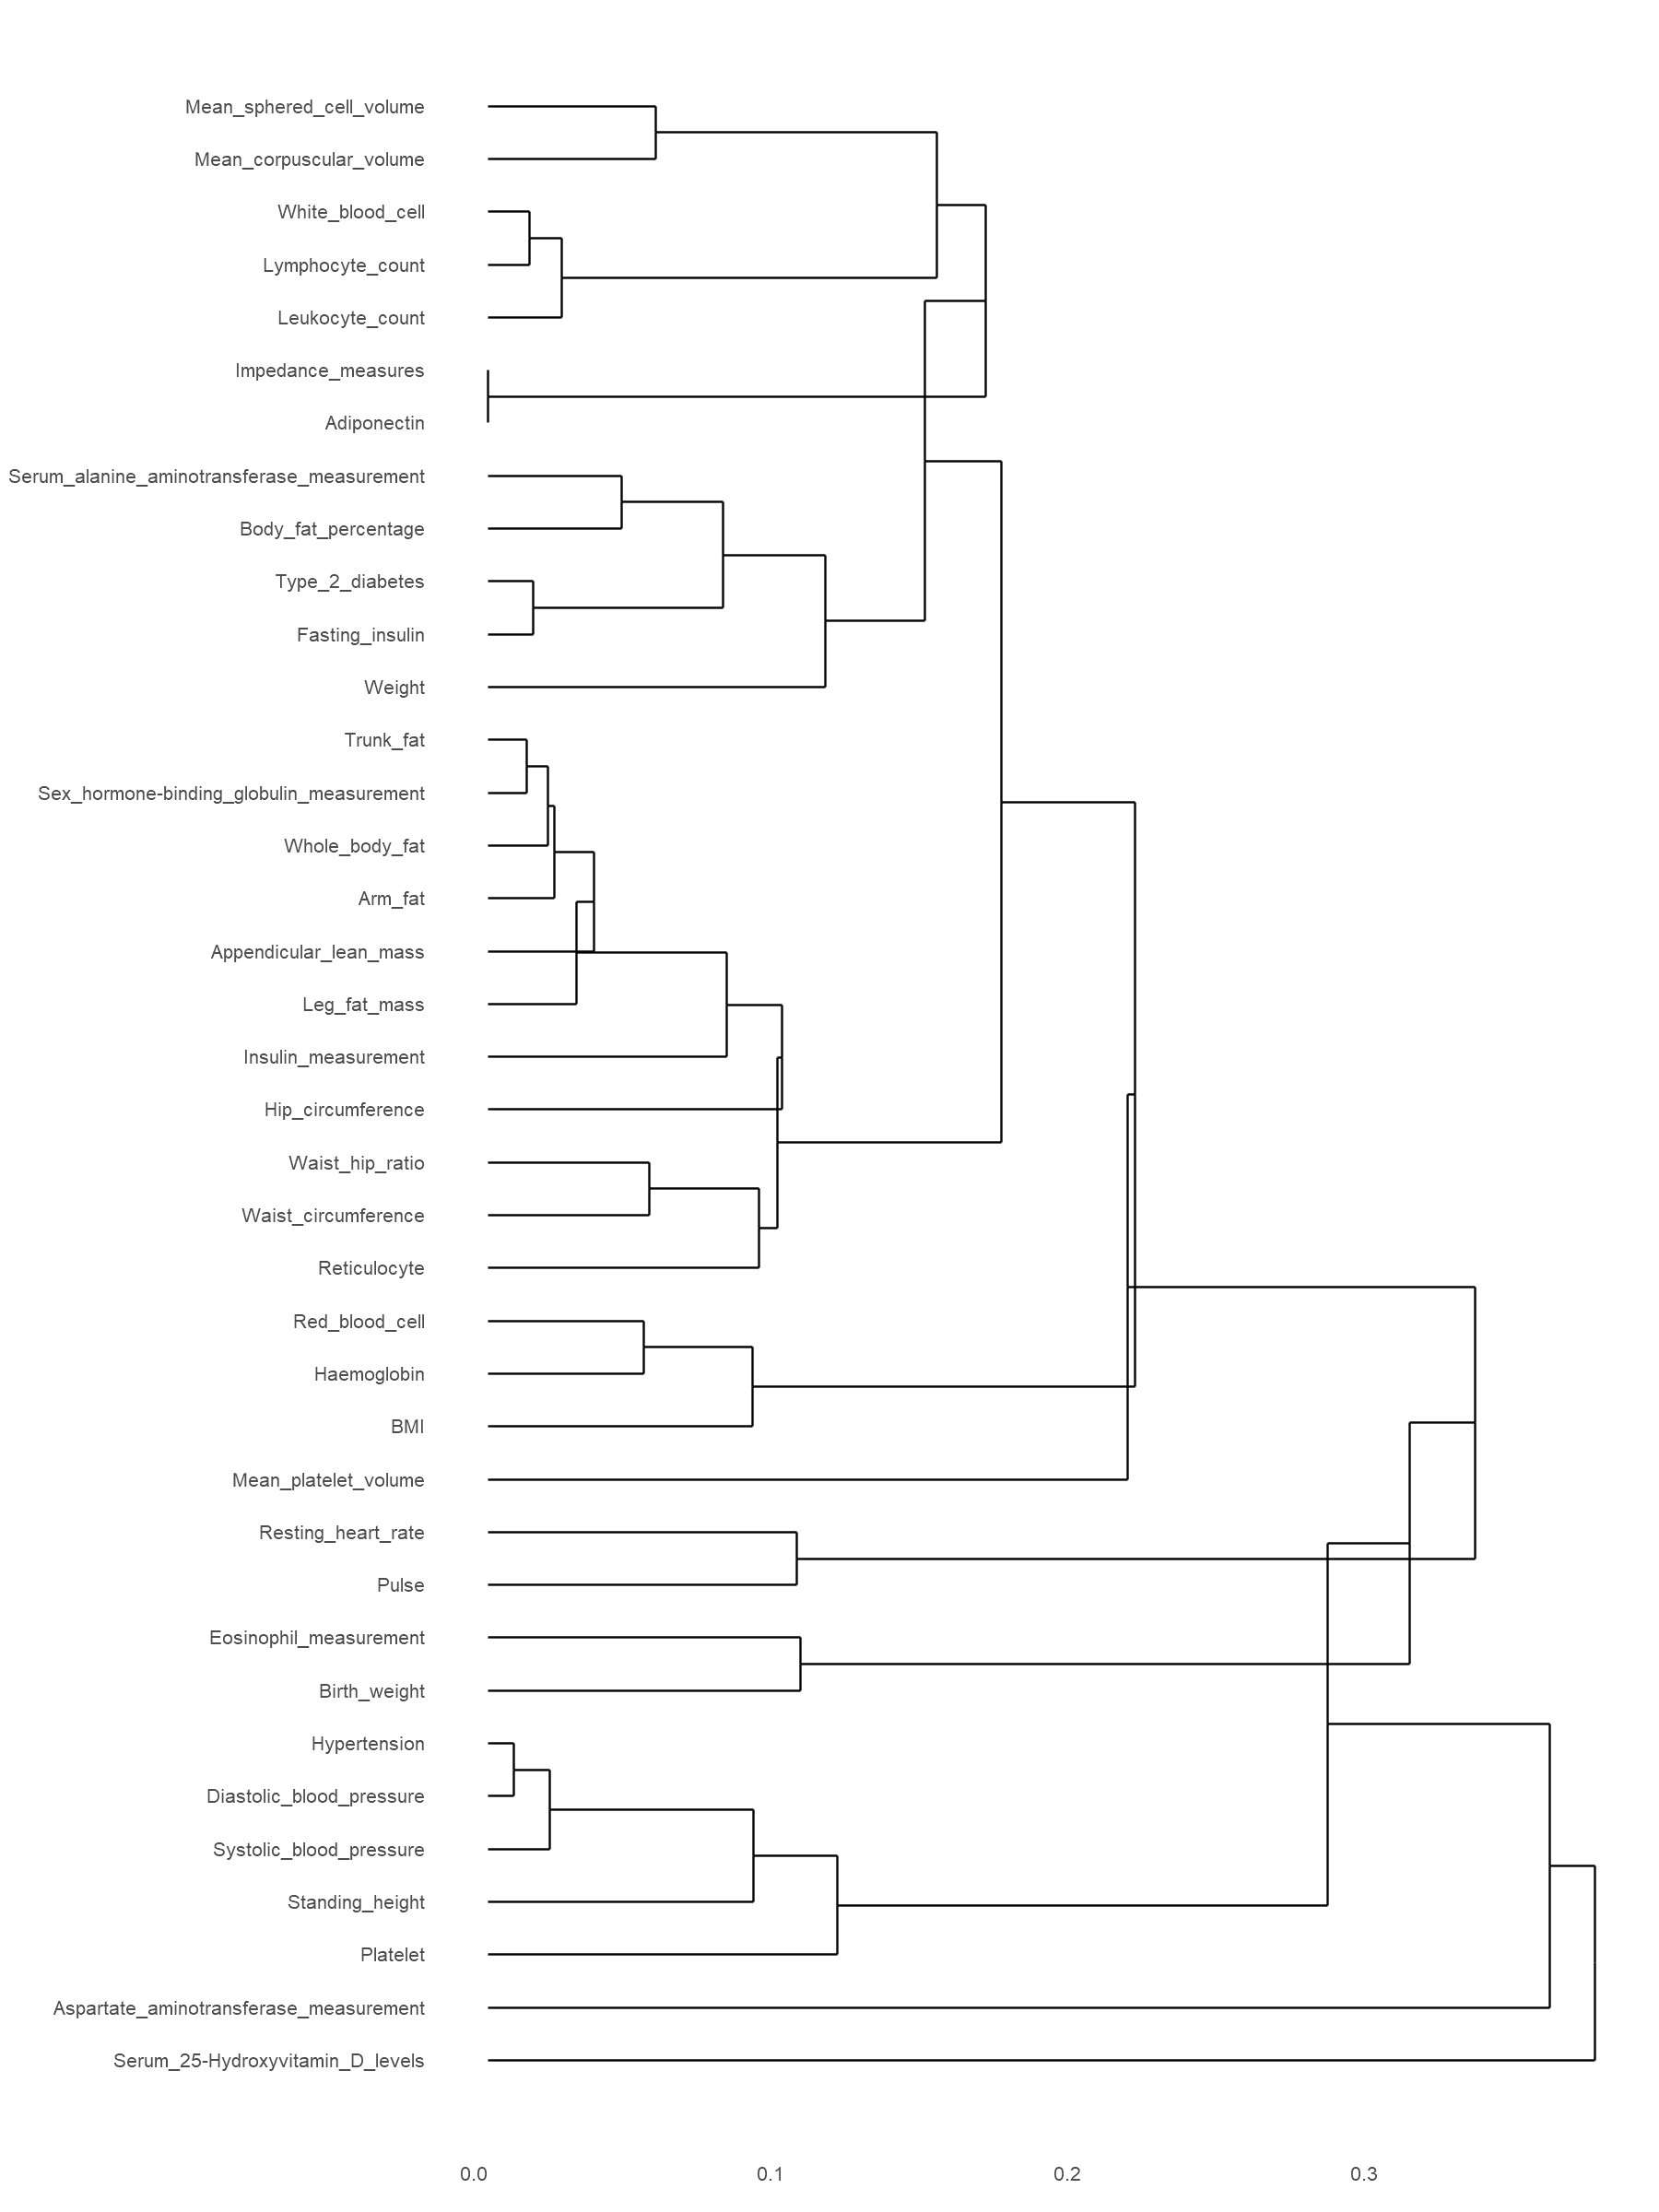

In [48]:
options(repr.plot.width=15, repr.plot.height=20)
ggdendrogram(fit, rotate = TRUE)+theme(axis.text=element_text(size=12),axis.title=element_text(size=12))+ theme(legend.text=element_text(size=14))

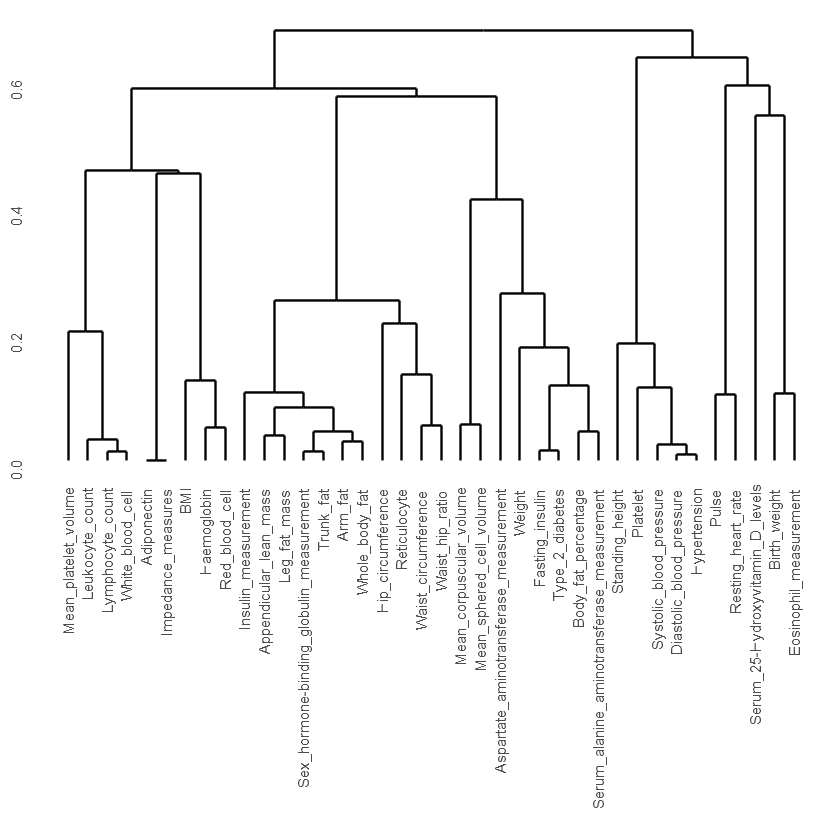

In [22]:
ggdendrogram(fit, rotate = FALSE, size = 2)

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



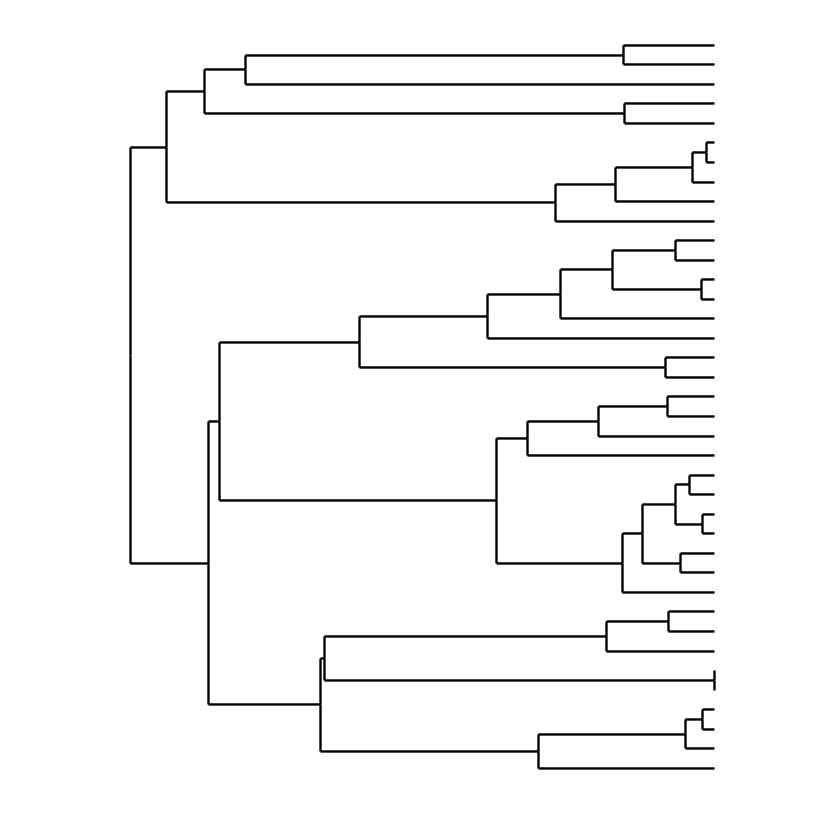

In [18]:
dhc <- as.dendrogram(fit)
# Rectangular lines
ddata <- dendro_data(dhc, type = "rectangle")
p <- ggplot(segment(ddata)) + 
  geom_segment(aes(x = x, y = y, xend = xend, yend = yend)) + 
  coord_flip() + 
  scale_y_reverse(expand = c(0.2, 0))
p + coord_flip() + theme_dendro()

In [10]:
data <- read.table("../../../../Downloads/TagSeqExample.tab", header=T, row.names="gene")

In [11]:
data_subset <- as.matrix(data[rowSums(data)>50000,])

In [12]:
data_subset

,T1a,T1b,T2,T3,N1,N2
Gene_00562,32314,29693,66140,17973,47994,30878
Gene_02115,15261,23301,1944,4578,4087,1072
Gene_02296,6730,5389,14491,15620,29445,14653
Gene_02420,5827,3938,18800,5592,26430,9071
Gene_02800,5961,7833,10303,15709,17405,10946
Gene_03194,7611,6806,13506,5727,25020,9235
Gene_03450,11057,11334,10820,13182,21878,9788
Gene_03852,3723,3051,13897,12083,9164,12712
Gene_03861,6046,8687,22098,11139,20054,12083
Gene_04164,2478,1688,7334,14702,11040,15334
